In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import os
from skimage.io import imread, imsave
import matplotlib.pyplot as plt


## Separación en conjunto de entrenamiento, validación y prueba

En este notebook se presentara el codigo utilizado para separar los datos en tres conjuntos. Es importante notar que correr el codigo provocara un error, pues la base de datos no esta subida al GitLab. Este notebook es solamente expositivo.

Se definen las rutas relevantes.

In [19]:
ruta_csv = 'ISIC-2017_Training_Part3_GroundTruth.csv'
ruta_imagenes = 'ISIC-2017_Training_procesado'

Para comenzar, se separa el .csv en tres archivos distintos. Uno para entrenamiento, otro para validación y un ultimo para prueba. Primero se define la función *get_dataset*, que hace justamente esto.

In [111]:
def get_dataset(ruta_imagenes, ruta_csv):
    
    # Leo csv
    datos = pd.read_csv(ruta_csv)

    # Veo nombre de imágenes en la sub-base
    files = os.listdir(ruta_imagenes)
    img_subb = []
    for nombre in files:
        img_subb.append(nombre.split('_procesado.jpg')[0])

    # Creo nuevo dataframe 
    dataset = datos[datos['image_id'].isin(img_subb)]
    dataset = dataset.drop('seborrheic_keratosis', axis = 1)

    # Separo en data y etiquetas
    labels = dataset['melanoma'].values
    data = dataset.drop('melanoma', axis = 1)

    # Separo manteniendo la proporción entre las clases
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=42)

    train = X_train.copy()
    train['melanoma'] = y_train

    val = X_val.copy()
    val['melanoma'] = y_val

    test = X_test.copy()
    test['melanoma'] = y_test

    return train, val, test

Realizo la separación y guardo los DataFrames en tres .csv distintos.

In [112]:
train, val, test = get_dataset(ruta_imagenes, ruta_csv)

train.to_csv('train.csv', index=False)
val.to_csv('val.csv', index=False)
test.to_csv('test.csv', index=False)

A continuación se muestra la proporcion de cada clase en los 3 conjuntos. Se tuvo cuidado de realizar una separación estratificada, por lo que las proporciones son similares.

In [113]:
print('----> Train')
print(np.sum(train['melanoma'].values == 0))
print(np.sum(train['melanoma'].values == 1))
print('Proporcion: ', np.sum(train['melanoma'].values == 1)/np.sum(train['melanoma'].values == 0))

print('----> Val')
print(np.sum(val['melanoma'].values == 0))
print(np.sum(val['melanoma'].values == 1))
print('Proporcion: ', np.sum(val['melanoma'].values == 1)/np.sum(val['melanoma'].values == 0))

print('----> Test')
print(np.sum(test['melanoma'].values == 0))
print(np.sum(test['melanoma'].values == 1))
print('Proporcion: ', np.sum(test['melanoma'].values == 1)/np.sum(test['melanoma'].values == 0))

----> Train
826
205
Proporcion:  0.24818401937046006
----> Val
147
36
Proporcion:  0.24489795918367346
----> Test
417
104
Proporcion:  0.24940047961630696


Ahora falta separar las imagenes en sus carpetas respectivas. Para comenzar, se definen los directorios relevantes.

In [124]:
carpeta_origen = 'ISIC-2017_Training_procesado'
carpeta_destino_train = 'Train'
carpeta_destino_val = 'Val'
carpeta_destino_test = 'Test'

Comenzando por las imagenes de train, las movemos a la carpeta llamada *Train*.

In [125]:
if not os.path.exists(carpeta_destino_train):
    os.makedirs(carpeta_destino_train)

for name in train['image_id']:
    file = name + '_procesado.jpg'
    input_path = os.path.join(carpeta_origen, file)
    I = imread(input_path)
    output_path = os.path.join(carpeta_destino_train, name + '.jpg')
    plt.imsave(output_path, I)


Pasando a las imagenes de validación, las movemos a la carpeta llamada *Val*.

In [127]:
if not os.path.exists(carpeta_destino_val):
    os.makedirs(carpeta_destino_val)

for name in val['image_id']:
    file = name + '_procesado.jpg'
    input_path = os.path.join(carpeta_origen, file)
    I = imread(input_path)
    output_path = os.path.join(carpeta_destino_val, name + '.jpg')
    plt.imsave(output_path, I)

Para terminar, movemos las imagenes asociadas al conjunto de prueba a *Test*.

In [128]:
if not os.path.exists(carpeta_destino_test):
    os.makedirs(carpeta_destino_test)

for name in test['image_id']:
    file = name + '_procesado.jpg'
    input_path = os.path.join(carpeta_origen, file)
    I = imread(input_path)
    output_path = os.path.join(carpeta_destino_test, name + '.jpg')
    plt.imsave(output_path, I)


Finalmente, se separa el ground truth de igual manera que las imagenes.

In [12]:
# Ahora separo el ground truth para train, val y test
carpeta_origen = 'Train'
carpeta_donde_buscar = 'cosas/ISIC-2017_Training_Part1_GroundTruth'
carpeta_destino = 'Train_Ground_Truth'

if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

files = os.listdir(carpeta_origen)
for name in files:
    segmentation = name.split('.')[0] + '_segmentation.png'
    ruta = input_path = os.path.join(carpeta_donde_buscar, segmentation)
    I = imread(ruta)
    output_path = os.path.join(carpeta_destino, segmentation)
    plt.imsave(output_path, I, cmap = 'gray')

In [ ]:
carpeta_origen = 'Val'
carpeta_donde_buscar = 'cosas/ISIC-2017_Training_Part1_GroundTruth'
carpeta_destino = 'Val_Ground_Truth'

if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

files = os.listdir(carpeta_origen)
for name in files:
    segmentation = name.split('.')[0] + '_segmentation.png'
    ruta = input_path = os.path.join(carpeta_donde_buscar, segmentation)
    I = imread(ruta)
    output_path = os.path.join(carpeta_destino, segmentation)
    plt.imsave(output_path, I, cmap = 'gray')

In [ ]:
carpeta_origen = 'Test'
carpeta_donde_buscar = 'cosas/ISIC-2017_Training_Part1_GroundTruth'
carpeta_destino = 'Test_Ground_Truth'

if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

files = os.listdir(carpeta_origen)
for name in files:
    segmentation = name.split('.')[0] + '_segmentation.png'
    ruta = input_path = os.path.join(carpeta_donde_buscar, segmentation)
    I = imread(ruta)
    output_path = os.path.join(carpeta_destino, segmentation)
    plt.imsave(output_path, I, cmap = 'gray')

A continuación se muestra de manera grafica la cantidad de elemntos de cada clase en los conjuntos de entrenamiento y validación. La clase "0" corresponde a las lesiones benignas y la clase "1" a las malignas.

In [2]:
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')

In [9]:
train_cantidad = np.array([826, 205])
val_cantidad = np.array([147, 36])
clase = np.array([0, 1])


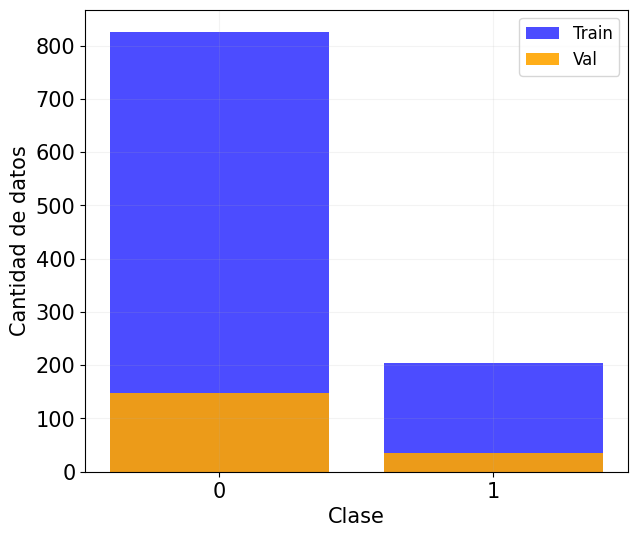

In [22]:
plt.figure(figsize=(7,6))
plt.bar(clase, train_cantidad, color = 'blue', label = 'Train', alpha = 0.7)
plt.xlabel('Nivel', fontsize = 15)
plt.ylabel('Cantidad de datos', fontsize = 15)
plt.grid(alpha = 0.15)
plt.tick_params(axis='both', labelsize=15) 
plt.bar(clase, val_cantidad, color = 'orange', label = 'Val', alpha = 0.9)
plt.xlabel('Clase')
plt.xticks([0, 1])
plt.ylabel('Cantidad de datos')
plt.legend(fontsize = 12)